In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
kwf2 = dl.load_kelmarsh_data(from_raw=False)

In [3]:
# See run.py for meaning of these parameters
uk = True
shifts = [1,6,144]
non_nan_percentage = 90 
col_to_be_lagged = ["Wind speed (m/s)",'Long Term Wind (m/s)', 
                   'Density adjusted wind speed (m/s)',
                   'Wind direction (°)']
val_ratio=0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]

## Run models

In [4]:
models = run.pipeline(kwf2, uk, shifts, non_nan_percentage, 
                      col_to_be_lagged, val_ratio, scalers)

Finished training model 10min horizon
Finished training model 1 hour horizon
Finished training model 1 day horizon


## Plot results

In [5]:
visualizations.plot_metrics("Kelmarsh",models)

| Model Name              |    RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|--------:|-----------------:|---------:|----------------:|
| Kelmarsh 10min horizon  | 142.247 |          145.603 |  89.4197 |         91.5538 |
| Kelmarsh 1 hour horizon | 247.722 |          263.749 | 170.343  |        183.286  |
| Kelmarsh 1 day horizon  | 624.862 |          623.023 | 500.395  |        510.71   |


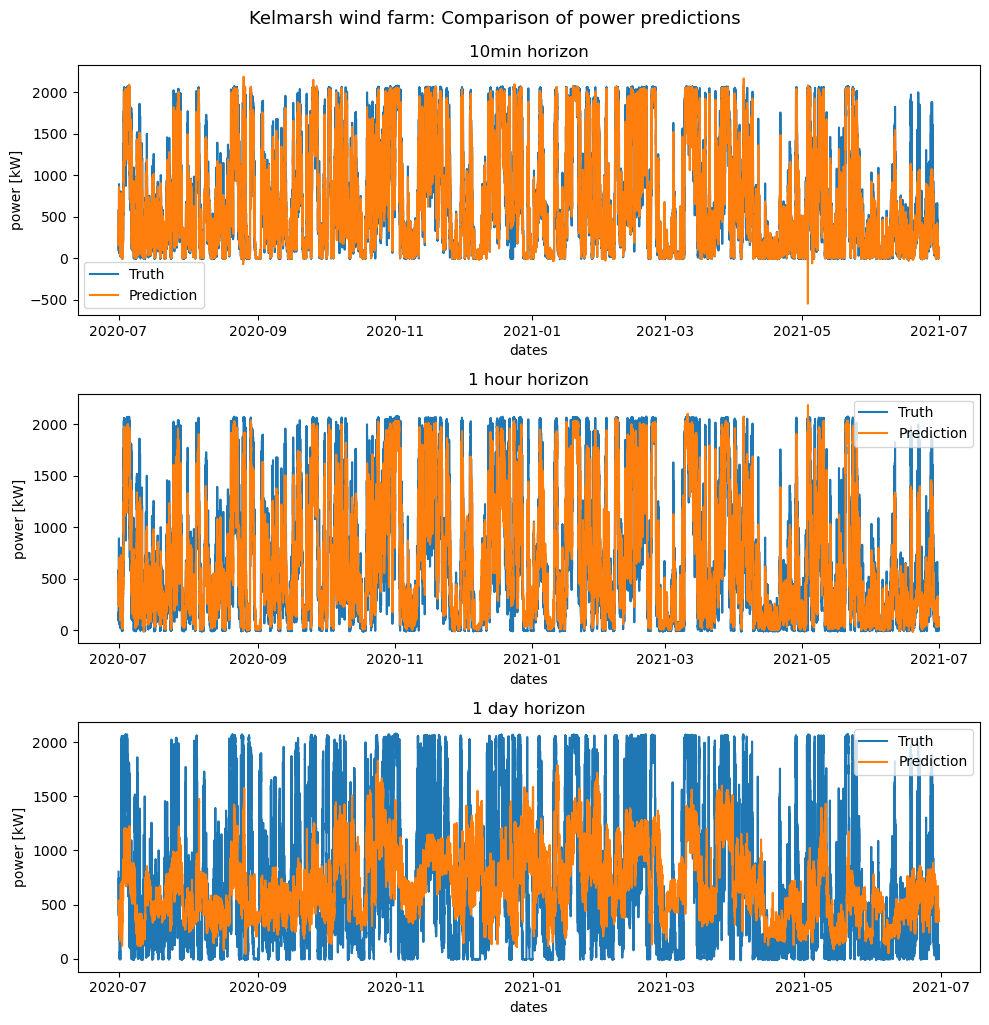

In [6]:
visualizations.plot_models("Kelmarsh",models)
